In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cereal.csv')

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.rename(columns={'mfr':'manufacturer'}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          77 non-null     object 
 1   manufacturer  77 non-null     object 
 2   type          77 non-null     object 
 3   calories      77 non-null     int64  
 4   protein       77 non-null     int64  
 5   fat           77 non-null     int64  
 6   sodium        77 non-null     int64  
 7   fiber         77 non-null     float64
 8   carbo         77 non-null     float64
 9   sugars        77 non-null     int64  
 10  potass        77 non-null     int64  
 11  vitamins      77 non-null     int64  
 12  shelf         77 non-null     int64  
 13  weight        77 non-null     float64
 14  cups          77 non-null     float64
 15  rating        77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
how_many_missing_values = df.isnull().sum()
print(how_many_missing_values[:])

name            0
manufacturer    0
type            0
calories        0
protein         0
fat             0
sodium          0
fiber           0
carbo           0
sugars          0
potass          0
vitamins        0
shelf           0
weight          0
cups            0
rating          0
dtype: int64


In [6]:
unique_values_column1 = df['name'].value_counts()

pd.set_option('display.max_rows', None)
print(unique_values_column1)

name
100% Bran                                 1
Nutri-Grain Almond-Raisin                 1
Quaker Oat Squares                        1
Puffed Wheat                              1
Puffed Rice                               1
Product 19                                1
Post Nat. Raisin Bran                     1
Oatmeal Raisin Crisp                      1
Nutri-grain Wheat                         1
Nut&Honey Crunch                          1
Just Right Fruit & Nut                    1
Multi-Grain Cheerios                      1
Mueslix Crispy Blend                      1
Muesli Raisins; Peaches; & Pecans         1
Muesli Raisins; Dates; & Almonds          1
Maypo                                     1
Lucky Charms                              1
Life                                      1
Quaker Oatmeal                            1
Raisin Bran                               1
Raisin Nut Bran                           1
Raisin Squares                            1
Wheaties                   

In [7]:
new_column_names = {'protein': 'protein (g)', 'fat': 'fat (g)','sodium': 'sodium (mg)','fiber':'fiber (g)','carbo':'carbohydrates (g)','sugars':'sugars (g)','potass':'potassium (mg)','vitamins': 'vitamins %', 'weight':'weight (oz/serv)','cups': 'cups/serv'}
df = df.rename(columns=new_column_names)

In [8]:
df['manufacturer'] = df['manufacturer'].replace({'A':'American Home Food Products','G':'General Mills','K' : 'Kelloggs','N' : 'Nabisco','P' : 'Post','Q' : 'Quaker Oats', 'R' : 'Ralston Purina'})

In [9]:
df.head()

,name,manufacturer,type,calories,protein (g),fat (g),sodium (mg),fiber (g),carbohydrates (g),sugars (g),potassium (mg),vitamins %,shelf,weight (oz/serv),cups/serv,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [10]:
# Retrieving the 10 most caloric cereals
more_caloric_cereals = df.sort_values(by= 'calories', ascending = False)
top10_caloric_cereals = more_caloric_cereals.head(10)

# Retrieving the 10 less caloric cereals
less_caloric_cereals = df.sort_values(by= 'calories', ascending = True)
the10_less_caloric_cereals = less_caloric_cereals.head(10)

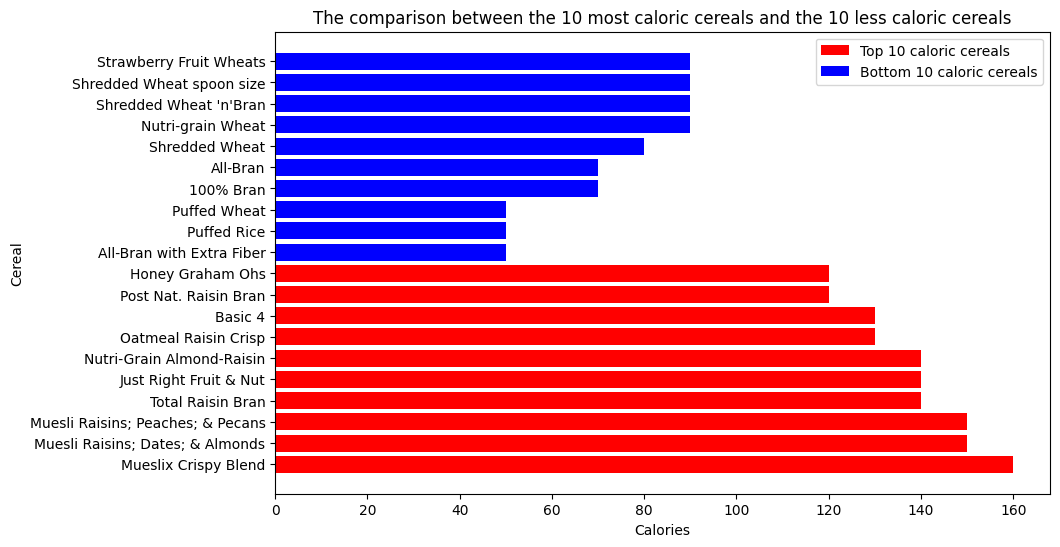

In [11]:
plt.figure(figsize=(10,6))
plt.barh(top10_caloric_cereals['name'],top10_caloric_cereals['calories'], color = 'red', label = 'Top 10 caloric cereals')
plt.barh(the10_less_caloric_cereals['name'], the10_less_caloric_cereals['calories'], color = 'blue', label = 'Bottom 10 caloric cereals')
plt.xlabel('Calories')
plt.ylabel('Cereal')
plt.title('The comparison between the 10 most caloric cereals and the 10 less caloric cereals')
plt.legend()
plt.show()

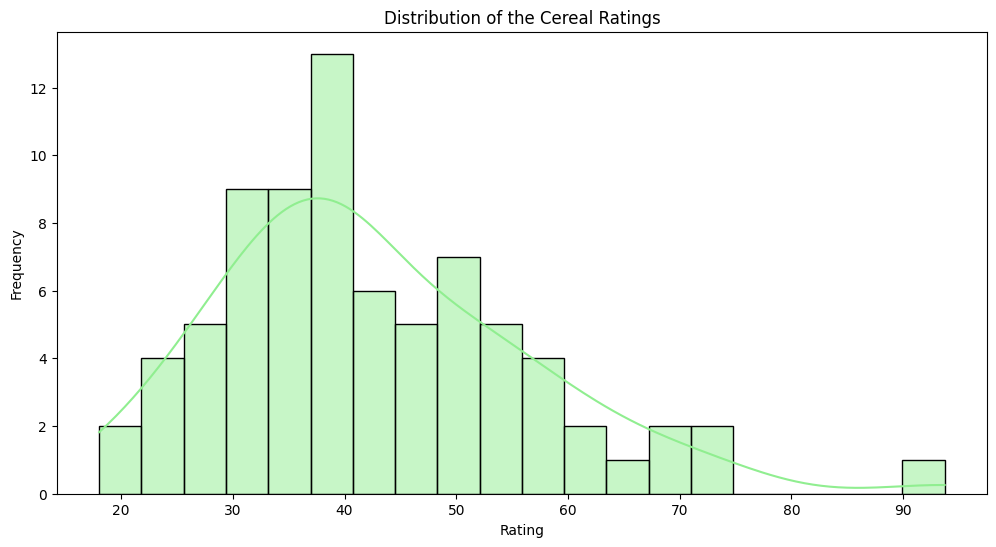

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df['rating'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of the Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
nutrients = df[['protein (g)','fat (g)', 'carbohydrates (g)', 'sugars (g)', 'fiber (g)']]
correlation = nutrients.corr()
print(correlation)

                   protein (g)   fat (g)  carbohydrates (g)  sugars (g)  \
protein (g)           1.000000  0.208431          -0.130864   -0.329142   
fat (g)               0.208431  1.000000          -0.318043    0.270819   
carbohydrates (g)    -0.130864 -0.318043           1.000000   -0.331665   
sugars (g)           -0.329142  0.270819          -0.331665    1.000000   
fiber (g)             0.500330  0.016719          -0.356083   -0.141205   

                   fiber (g)  
protein (g)         0.500330  
fat (g)             0.016719  
carbohydrates (g)  -0.356083  
sugars (g)         -0.141205  
fiber (g)           1.000000  


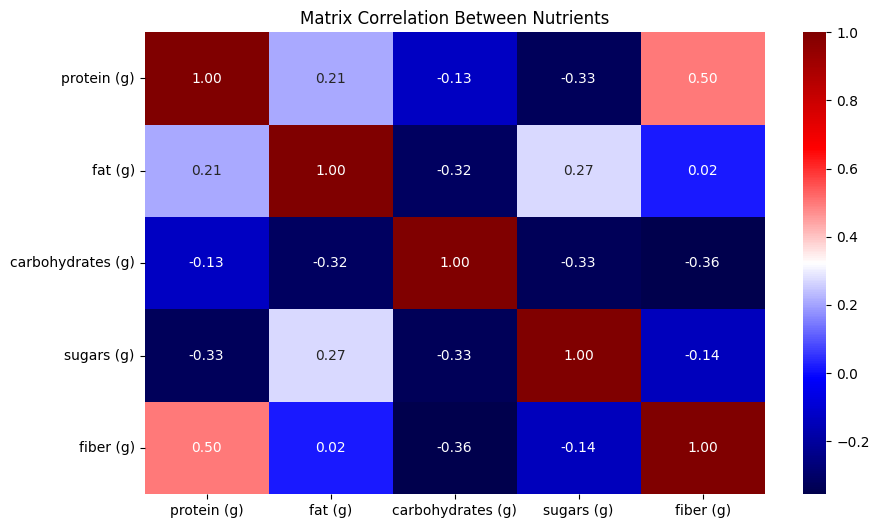

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='seismic',fmt=".2f")
plt.title('Matrix Correlation Between Nutrients')
plt.show()